In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Information on dataset: The dataset contains records from both ischemic and hemorrhagic strokes. The criteria used to define a stroke was that a stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked (ischemic) by a clot or bursts (hemorrhagic).

In [ ]:
#now import data set
df=pd.read_csv('healthcare_stroke_data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#check null value
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#check duplicates
df.duplicated().sum()

0

In [ ]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#as we can see id is not seems important to predict the outcome so first we will drop the id column
df.drop('id',axis=1,inplace=True)

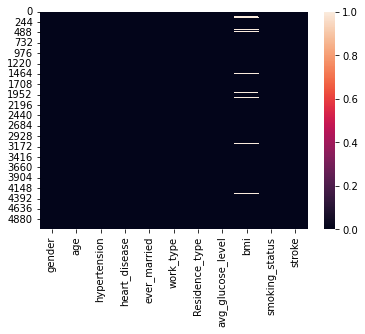

In [ ]:
#now to visualise the null value
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#as we already check the null value is less than 50% so we will fill the null value with the median
#now we will fill the null value with the median
m=df['bmi'].median()
print(m)
df['bmi'].fillna(m,inplace=True)

28.1


In [ ]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#now we will check the null value once again
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

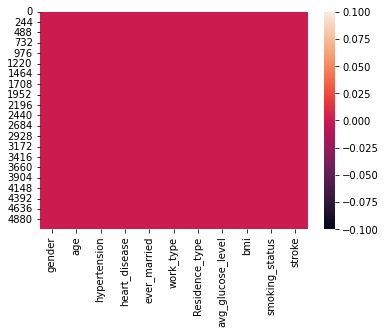

In [ ]:
#visualising the null value
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#after handling the null value we will check the data type of dataset.
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
#now we have to make sure that we should have data set in numerical form as 
#machine only understands the numbers
#so we have to split the data which is numerical and categorical
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [ ]:
df_num.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


In [ ]:
df_cat.head(5)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [ ]:
#now we will convert the data into numeric form by using LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in df_cat:
    #now create object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [ ]:
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
...,...,...,...,...,...
5105,0,1,2,1,2
5106,0,1,3,1,2
5107,0,1,3,0,2
5108,1,1,2,0,1


In [ ]:
#noe we can check the data type of df_cat which was categorical data
df_cat.dtypes

gender            int64
ever_married      int64
work_type         int64
Residence_type    int64
smoking_status    int64
dtype: object

In [ ]:
#after converting the complete dataset into numerical data types we need to 
#concatenate df_cat and df_num
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
1,61.0,0,0,202.21,28.1,1,0,1,3,0,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2


In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# here we use RandomOverSampling inbuilt class
#that means we will craete a duplicate minority class till it match the level of 
#majority class
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Check how many samples of class 0 and 1 class in stroke
df_new['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
##select input and output
x=df_new.drop('stroke',axis=1) #input
y=df_new['stroke'] # output

In [ ]:
from sklearn.model_selection import train_test_split
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
#Applying Scaling 

from sklearn.preprocessing import StandardScaler

In [ ]:
#Creating object of StandardScaler Class

ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
df_new['gender'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [ ]:
#create a nural network architecture
import tensorflow as tf

In [ ]:
x.shape

(5110, 10)

In [ ]:
model=tf.keras.Sequential([
                          tf.keras.layers.Dense(units=10,activation='relu',input_shape=(x.shape[1],)),
                           #First hidden layer
                           tf.keras.layers.Dense(units=10,activation='relu'), #second hidden layer
                           tf.keras.layers.Dense(units=1,activation='sigmoid') #output layer
])

In [ ]:
#to show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].weights
#to see weight of first hidden layer

[<tf.Variable 'dense/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[-0.0183692 , -0.15460864, -0.45090884,  0.1574319 , -0.11622134,
          0.24810869,  0.2224347 ,  0.3387527 ,  0.4735366 ,  0.15092528],
        [ 0.22720063, -0.42907676, -0.01807326,  0.2075389 ,  0.50121355,
         -0.44011164,  0.5116985 , -0.47381842, -0.5213467 ,  0.2859524 ],
        [ 0.13016856, -0.16871428, -0.2871305 ,  0.4097163 , -0.31596327,
         -0.22016382, -0.130205  , -0.24026   , -0.24146143,  0.26075882],
        [-0.2374345 ,  0.12541467, -0.10188168, -0.50555074,  0.5203134 ,
         -0.25086984, -0.03180319,  0.22656417,  0.06635582, -0.53732926],
        [-0.42894357,  0.49569833, -0.21921471,  0.08283556, -0.38851726,
          0.12744087, -0.12598574, -0.54572797,  0.46954834,  0.25168198],
        [-0.08665025,  0.22468942, -0.11888728, -0.33538577,  0.509032  ,
          0.04713857, -0.29725468,  0.28840464, -0.46188262, -0.51503867],
        [ 0.51290655,  0.23303199, -0.

In [ ]:
#complie the model
#use inbuilt method compile() of sequential class
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
#create ca procedure of call back
#Early Stopping : 
#EarlyStopping : for decide epoch
#create a procedure for callback 
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
#EarlyStopping() inbuilt function
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=20,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)

In [ ]:
#traing the model
trained_model=model.fit(x_train,y_train,epochs=4000,callbacks=cb,validation_data=(x_test,y_test))

Epoch 1/4000
112/112 [==============================] - 1s 4ms/step - loss: 0.4304 - accuracy: 0.8977 - val_loss: 0.3186 - val_accuracy: 0.9459
Epoch 2/4000
112/112 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.9536 - val_loss: 0.2423 - val_accuracy: 0.9459
Epoch 3/4000
112/112 [==============================] - 0s 3ms/step - loss: 0.2093 - accuracy: 0.9536 - val_loss: 0.2202 - val_accuracy: 0.9459
Epoch 4/4000
112/112 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9536 - val_loss: 0.2120 - val_accuracy: 0.9459
Epoch 5/4000
112/112 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9536 - val_loss: 0.2075 - val_accuracy: 0.9459
Epoch 6/4000
112/112 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.9536 - val_loss: 0.2043 - val_accuracy: 0.9459
Epoch 7/4000
112/112 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9536 - val_loss: 0.2016 - val_accuracy:

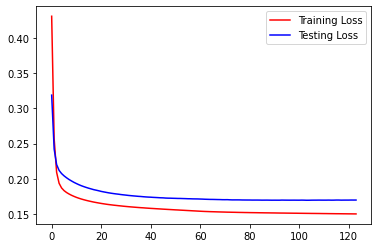

In [ ]:
#visualisation
plt.plot(trained_model.history['loss'],color='red',label='Training Loss')
plt.plot(trained_model.history['val_loss'],color='blue',label='Testing Loss')
plt.legend()
plt.show()

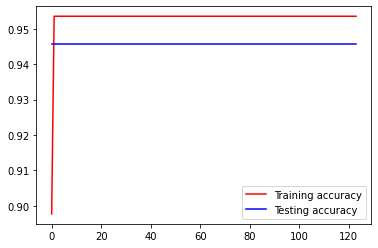

In [ ]:
#visualisation
plt.plot(trained_model.history['accuracy'],color='red',label='Training accuracy')
plt.plot(trained_model.history['val_accuracy'],color='blue',label='Testing accuracy')
plt.legend()
plt.show()

In [ ]:
#training evaluation
model.evaluate(x_train,y_train)

112/112 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.9536


[0.15007176995277405, 0.9535924196243286]

In [ ]:
#testing evaluation
model.evaluate(x_test,y_test)

48/48 [==============================] - 0s 1ms/step - loss: 0.1700 - accuracy: 0.9459


[0.16997507214546204, 0.94585782289505]

In [ ]:
#test the model with 30% data
y_pred=model.predict(x_test).round(2) #y_pred=(1/(1+np.exp(-x_test)))
#it will give probability value range (0  -  1)
print(y_pred)

[[0.01]
 [0.15]
 [0.  ]
 ...
 [0.06]
 [0.24]
 [0.01]]


In [ ]:
#condition apply
y_pred=np.where(y_pred>=0.5,1,0)
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
#classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533

[[1450    0]
 [  83    0]]


Here as we can see Acuuracy of the model is 95% and we will try ti imporve the accuracy as we already checked the target data is not balanced so now we will apply RandomOverSampler it will take the level of minority class to majority class.

In [ ]:
#first instal imblearn package
#!pip install imblearn

In [ ]:
# here we use RandomOverSampling inbuilt class
#that means we will craete a duplicate minority class till it match the level of 
#majority class
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Check how many samples of class 0 and 1 class in Y_train
y_train.value_counts()

0    3411
1     166
Name: stroke, dtype: int64

In [ ]:
#now apply RandomOverSampler class
ros=RandomOverSampler(random_state=1)

In [ ]:
#use inbuilt method of fit_resample() of RandomOverSampler class
x_train_ros,y_train_ros=ros.fit_resample(x_train,y_train)

In [ ]:
#now will check if the training data is balanced or not
y_train_ros.value_counts()

0    3411
1    3411
Name: stroke, dtype: int64

In [ ]:
#As it is we will check how many samples of class 0 and 1 class in y_test 
y_test.value_counts()

0    1450
1      83
Name: stroke, dtype: int64

In [ ]:
# Now apply RandomOverSampler on testing data
x_test_ros,y_test_ros=ros.fit_resample(x_test,y_test)

In [ ]:
#again Check
y_test_ros.value_counts()

0    1450
1    1450
Name: stroke, dtype: int64

In [ ]:
x_test_ros.shape

(2900, 10)

In [ ]:
x.shape

(5110, 10)

In [ ]:
x_train.shape

(3577, 10)

In [ ]:
x_train_ros.shape

(6822, 10)

In [ ]:
x_test.shape

(1533, 10)

In [ ]:
x_test_ros.shape

(2900, 10)

In [ ]:
#traing the model
trained_model_1=model.fit(x_train_ros,y_train_ros,epochs=4000,callbacks=cb,validation_data=(x_test_ros,y_test_ros))

Epoch 1/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5985 - val_loss: 0.5283 - val_accuracy: 0.7228
Epoch 2/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7316 - val_loss: 0.5017 - val_accuracy: 0.7421
Epoch 3/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.7356 - val_loss: 0.4891 - val_accuracy: 0.7672
Epoch 4/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7436 - val_loss: 0.4841 - val_accuracy: 0.7752
Epoch 5/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7471 - val_loss: 0.4785 - val_accuracy: 0.7734
Epoch 6/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7493 - val_loss: 0.4765 - val_accuracy: 0.7800
Epoch 7/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7468 - val_loss: 0.4738 - val_accuracy:

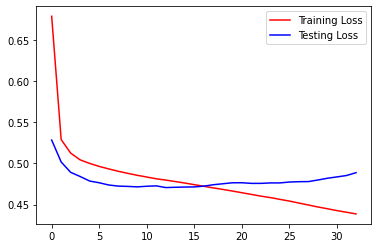

In [ ]:
#visualisation
plt.plot(trained_model_1.history['loss'],color='red',label='Training Loss')
plt.plot(trained_model_1.history['val_loss'],color='blue',label='Testing Loss')
plt.legend()
plt.show()

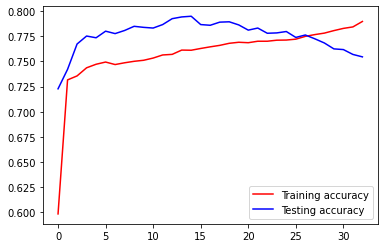

In [ ]:
#visualisation
plt.plot(trained_model_1.history['accuracy'],color='red',label='Training accuracy')
plt.plot(trained_model_1.history['val_accuracy'],color='blue',label='Testing accuracy')
plt.legend()
plt.show()

In [ ]:
#training evaluation
model.evaluate(x_train_ros,y_train_ros)

214/214 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.7794


[0.4375240206718445, 0.7793902158737183]

In [ ]:
#testing evaluation
model.evaluate(x_test,y_test)

48/48 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.7365


[0.46233102679252625, 0.7364644408226013]

In [ ]:
#test the model with 30% data
y_pred1=model.predict(x_test_ros).round(2) #y_pred=(1/(1+np.exp(-x_test)))
#it will give probability value range (0  -  1)
print(y_pred1)

[[0.13]
 [0.73]
 [0.01]
 ...
 [0.91]
 [0.69]
 [0.84]]


In [ ]:
#condition apply
y_pred1=np.where(y_pred1>=0.5,1,0)
print(y_pred1)

[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
print(classification_report(y_test_ros,y_pred1))
print(confusion_matrix(y_test_ros,y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1450
           1       0.74      0.77      0.76      1450

    accuracy                           0.75      2900
   macro avg       0.75      0.75      0.75      2900
weighted avg       0.75      0.75      0.75      2900

[[1060  390]
 [ 327 1123]]


Handling Overfitting by Ridg Regularization

In [ ]:
#now we will try to reduce overfitting
#call class regularisation: inbuilt class
from tensorflow.keras import regularizers
#regulizers is inbuilt class of keras

In [ ]:
model1=tf.keras.Sequential([
                          tf.keras.layers.Dense(units=10,activation='relu',input_shape=(x.shape[1],),
                          kernel_regularizer=regularizers.l2(0.01)),
                           #First hidden layer
                           tf.keras.layers.Dense(units=10,activation='relu',kernel_regularizer=regularizers.l2(0.01)), #second hidden layer
                           tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))]) #output layer

In [ ]:
#complie the model
#use inbuilt method compile() of sequential class
model1.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
trained_model_2=model1.fit(x_train_ros,y_train_ros,epochs=4000,callbacks=cb,validation_data=(x_test_ros,y_test_ros))

Epoch 1/4000
214/214 [==============================] - 1s 3ms/step - loss: 0.9007 - accuracy: 0.5658 - val_loss: 0.8035 - val_accuracy: 0.7072
Epoch 2/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.6620 - val_loss: 0.7540 - val_accuracy: 0.7517
Epoch 3/4000
214/214 [==============================] - 1s 2ms/step - loss: 0.7889 - accuracy: 0.6969 - val_loss: 0.7174 - val_accuracy: 0.7700
Epoch 4/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.7561 - accuracy: 0.7232 - val_loss: 0.6875 - val_accuracy: 0.7655
Epoch 5/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.7299 - accuracy: 0.7322 - val_loss: 0.6660 - val_accuracy: 0.7697
Epoch 6/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.7394 - val_loss: 0.6484 - val_accuracy: 0.7848
Epoch 7/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.7425 - val_loss: 0.6334 - val_accuracy:

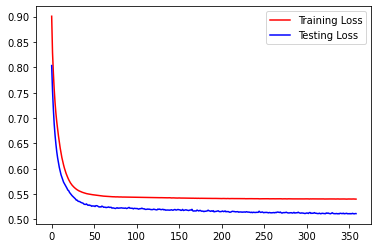

In [ ]:
#visualisation
plt.plot(trained_model_2.history['loss'],color='red',label='Training Loss')
plt.plot(trained_model_2.history['val_loss'],color='blue',label='Testing Loss')
plt.legend()
plt.show()

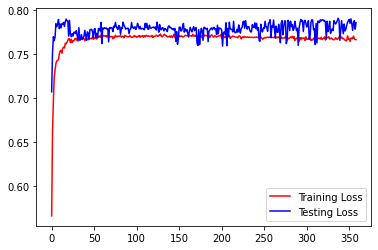

In [ ]:
plt.plot(trained_model_2.history['accuracy'],color='red',label='Training Loss')
plt.plot(trained_model_2.history['val_accuracy'],color='blue',label='Testing Loss')
plt.legend()
plt.show()

In [ ]:
#find prediction
y_pred2=model1.predict(x_test_ros).round(2)
y_pred2

array([[0.26],
       [0.78],
       [0.09],
       ...,
       [0.87],
       [0.72],
       [0.9 ]], dtype=float32)

In [ ]:
y_pred2=np.where(y_pred2>=0.5,1,0)
y_pred2

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
print(classification_report(y_test_ros,y_pred2))
print(confusion_matrix(y_test_ros,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1450
           1       0.74      0.87      0.80      1450

    accuracy                           0.78      2900
   macro avg       0.79      0.78      0.78      2900
weighted avg       0.79      0.78      0.78      2900

[[1012  438]
 [ 190 1260]]


Handling Overfitting by Lasso Regularization

In [ ]:
#now we will try to reduce overfitting
#call class regularisation: inbuilt class

In [ ]:
model2=tf.keras.Sequential([
                          tf.keras.layers.Dense(units=10,activation='relu',input_shape=(x.shape[1],),
                          kernel_regularizer=regularizers.l1(0.01)),
                           #First hidden layer
                           tf.keras.layers.Dense(units=10,activation='relu',kernel_regularizer=regularizers.l1(0.01)), #second hidden layer
                           tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l1(0.01))]) #output layer

In [ ]:
#complie the model
#use inbuilt method compile() of sequential class
model2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
trained_model_3=model2.fit(x_train_ros,y_train_ros,epochs=4000,callbacks=cb,validation_data=(x_test_ros,y_test_ros))

Epoch 1/4000
214/214 [==============================] - 1s 3ms/step - loss: 1.1720 - accuracy: 0.6453 - val_loss: 1.0911 - val_accuracy: 0.7276
Epoch 2/4000
214/214 [==============================] - 1s 2ms/step - loss: 1.0979 - accuracy: 0.6910 - val_loss: 1.0273 - val_accuracy: 0.7531
Epoch 3/4000
214/214 [==============================] - 0s 2ms/step - loss: 1.0449 - accuracy: 0.7121 - val_loss: 0.9766 - val_accuracy: 0.7645
Epoch 4/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.9993 - accuracy: 0.7249 - val_loss: 0.9320 - val_accuracy: 0.7728
Epoch 5/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.9572 - accuracy: 0.7376 - val_loss: 0.8915 - val_accuracy: 0.7955
Epoch 6/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.9179 - accuracy: 0.7386 - val_loss: 0.8534 - val_accuracy: 0.7966
Epoch 7/4000
214/214 [==============================] - 0s 2ms/step - loss: 0.8810 - accuracy: 0.7426 - val_loss: 0.8186 - val_accuracy:

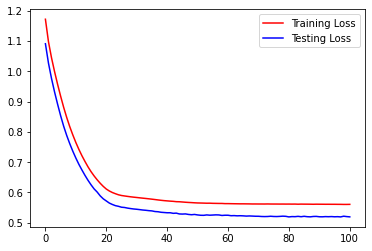

In [ ]:
#visualisation
plt.plot(trained_model_3.history['loss'],color='red',label='Training Loss')
plt.plot(trained_model_3.history['val_loss'],color='blue',label='Testing Loss')
plt.legend()
plt.show()

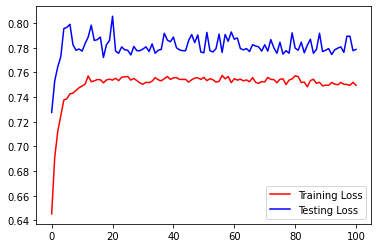

In [ ]:
plt.plot(trained_model_3.history['accuracy'],color='red',label='Training Loss')
plt.plot(trained_model_3.history['val_accuracy'],color='blue',label='Testing Loss')
plt.legend()
plt.show()

In [ ]:
#find prediction
y_pred3=model2.predict(x_test_ros).round(2)
y_pred3

array([[0.23],
       [0.78],
       [0.11],
       ...,
       [0.85],
       [0.77],
       [0.88]], dtype=float32)

In [ ]:
y_pred3=np.where(y_pred3>=0.5,1,0)
y_pred3

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
print(classification_report(y_test_ros,y_pred3))
print(confusion_matrix(y_test_ros,y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.71      0.77      1450
           1       0.75      0.85      0.79      1450

    accuracy                           0.78      2900
   macro avg       0.79      0.78      0.78      2900
weighted avg       0.79      0.78      0.78      2900

[[1036  414]
 [ 222 1228]]


As we can see accuracy of the model after applying Random Over Sampler is 79% but after applying Regularization that is Lasso and Ridge, accuracy of the model is 78%.